In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression,SelectPercentile
from feature_engine.selection import DropCorrelatedFeatures,SmartCorrelatedSelection
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,PowerTransformer
%matplotlib inline
import pickle

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', names = col_names, delim_whitespace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


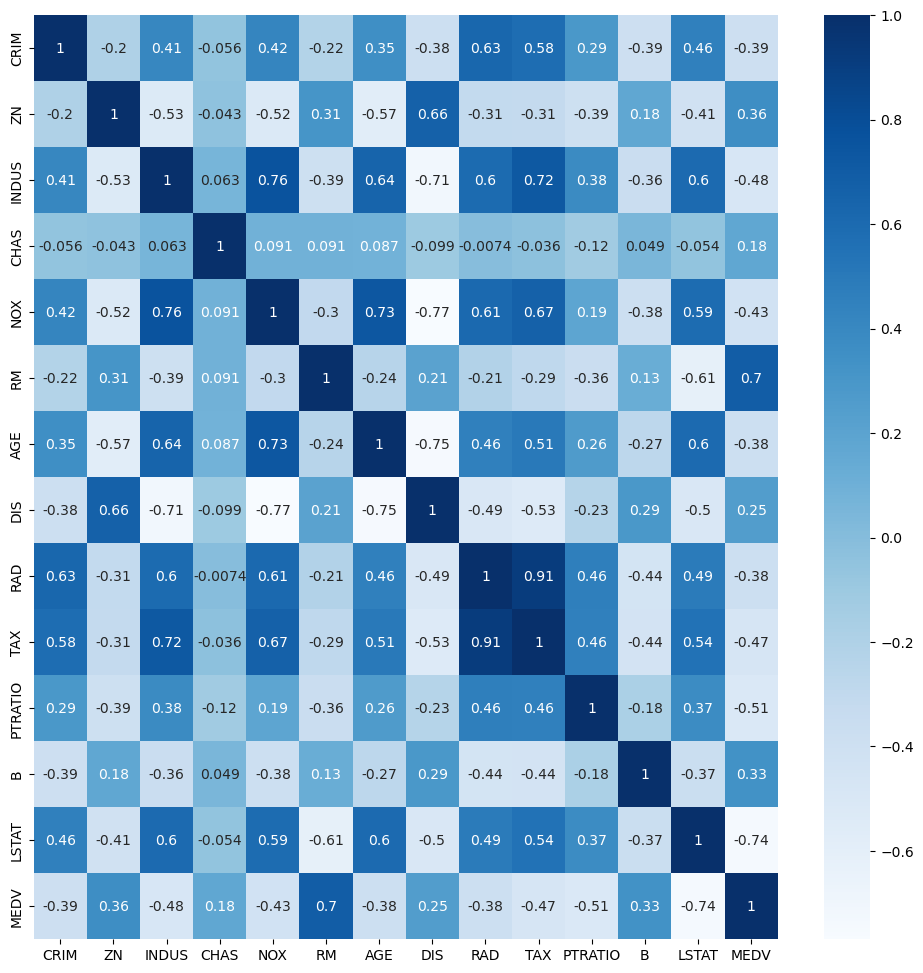

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

<AxesSubplot:xlabel='TAX', ylabel='RAD'>

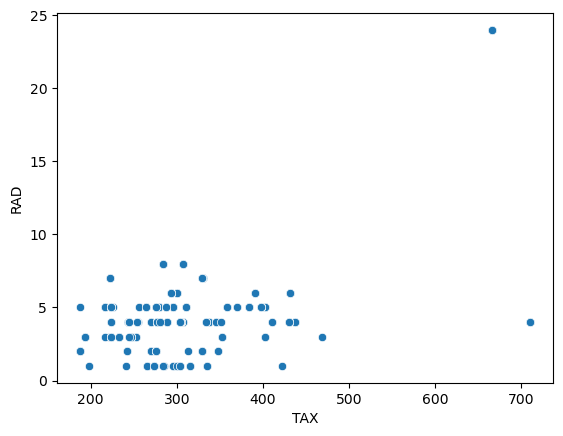

In [9]:
sns.scatterplot(x='TAX', y='RAD', data=df)

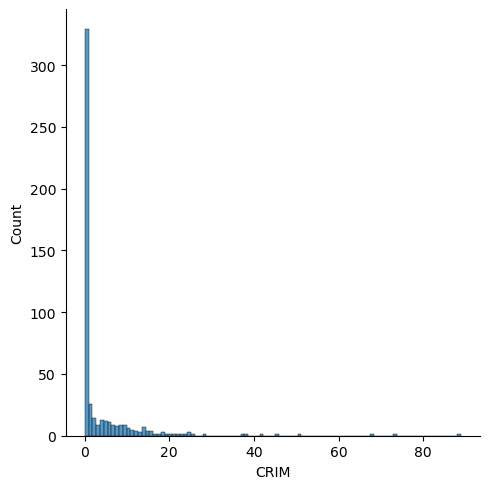

In [10]:
sns.displot(df.CRIM)

<AxesSubplot:xlabel='ZN'>

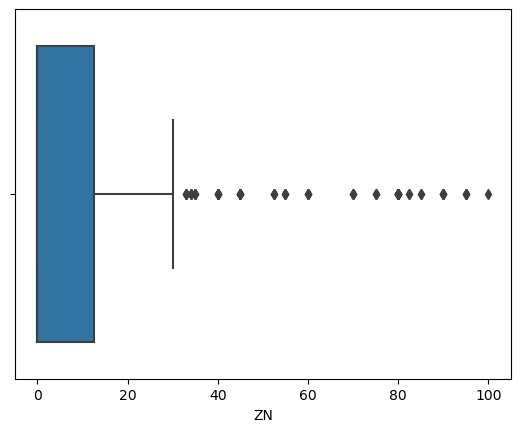

In [11]:
sns.boxplot(df.ZN)

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x.shape,y.shape

((506, 13), (506,))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [15]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [16]:
sel_v = VarianceThreshold(threshold=0.01)
sel_v.fit(x_train)

VarianceThreshold(threshold=0.01)

In [17]:
x_train = sel_v.transform(x_train)
x_train.shape
x_test = sel_v.transform(x_test)
x_test.shape

(102, 13)

In [18]:
drop_dup = DropCorrelatedFeatures(threshold=1.0, missing_values='raise')

In [19]:
drop_dup.fit(x_train)
drop_dup.get_feature_names_out()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [20]:
dup = drop_dup.transform(x_train)
dup.shape

(404, 13)

### there are no Duplicated Features

In [21]:
rfr = RandomForestRegressor()
drop_cor = SmartCorrelatedSelection(estimator=rfr)

In [22]:
drop_cor.fit(x_train, y_train)
x_train = drop_cor.transform(x_train)
x_train.shape

(404, 12)

In [23]:
x_test = drop_cor.transform(x_test)

In [24]:
sel_per = SelectPercentile(percentile=95)

In [26]:
sel_per.fit(x_train,y_train)

SelectPercentile(percentile=95)

In [27]:
col = sel_per.transform(x_train)
col.shape

(404, 11)

In [28]:
sel_ptrain = sel_per.transform(x_train)
sel_ptest = sel_per.transform(x_test)

In [29]:
std_ = StandardScaler()
std_.fit(sel_ptrain)
x_train = std_.transform(sel_ptrain)
x_test = std_.transform(sel_ptest)

In [30]:
x_train.shape

(404, 11)

In [32]:
xgb = XGBRegressor()

xgb.fit(x_train, y_train)

xgb_y_pred = xgb.predict(x_test)

print(mean_squared_error(xgb_y_pred, y_test))
print(r2_score(xgb_y_pred, y_test))
print(mean_absolute_error(xgb_y_pred, y_test))


6.277638039171615
0.9029034773415575
1.8734218672210095
Train
0.00046310278728656684
0.9999946664709152
0.015580635495705191


In [ ]:
pickle.dump()